In [1]:
import time
import gc
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import xlsxwriter
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
from sklearn import preprocessing
from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, roc_curve, roc_auc_score, recall_score, plot_confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from collections import Counter
import joblib

data_train = pd.read_csv('C:/Users/joao_/Desktop/4 ANO JOAO/SINO/VS CODE PROJETO/Datasets/bank-full-transformed.csv')

In [3]:
data_train = pd.read_csv('C:/Users/joao_/Desktop/4 ANO JOAO/SINO/VS CODE PROJETO/Jupyter Notebook/Data Transformation/bank-full-transformed.csv')

In [4]:
def encode(data_train, col):
    return pd.concat([data_train, pd.get_dummies(col, prefix=col.name)], axis=1)

data_train = encode(data_train, data_train.job)
data_train = encode(data_train, data_train.marital)
data_train = encode(data_train, data_train.education)
data_train = encode(data_train, data_train.month)


data_train.drop(['job', "marital", "education", "month"], axis=1, inplace=True)

In [5]:
data_x = data_train.drop(["y", "pdays"], axis =1)
data_y = data_train["y"]

In [6]:
data_x

,age,default,balance,housing,loan,day,campaign,previous,job_admin.,job_blue-collar,...,marital_married,marital_single,education_other,education_primary,education_secondary,education_tertiary,month_Inverno,month_Outono,month_Primavera,month_Verão
0,50,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,40,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,30,0,0,1,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,0,0,1,0,0,1,0,0,1,...,1,0,1,0,0,0,0,0,1,0
4,30,0,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45185,50,0,0,0,0,1,2,0,0,0,...,1,0,0,0,0,1,0,1,0,0
45186,60,0,0,0,0,1,2,0,0,0,...,0,0,0,1,0,0,0,1,0,0
45187,60,0,2,0,0,1,2,2,0,0,...,1,0,0,0,1,0,0,1,0,0
45188,50,0,0,0,0,1,2,0,0,1,...,1,0,0,0,1,0,0,1,0,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, shuffle = True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(36152, 31) (9038, 31) (36152,) (9038,)


In [8]:
smote = SMOTE()
X_resample, y_resample = smote.fit_resample(X_train, y_train)

In [9]:
models = []
models.append(('LogisticRregression', LogisticRegression(penalty = 'l2', max_iter = 100, C = 20)))
models.append(('KNeighborsClassifier', KNeighborsClassifier(weights= 'distance', n_neighbors= 30, n_jobs= -1, leaf_size= 5)))
models.append(('Decison-Tree', DecisionTreeClassifier(criterion='gini', max_depth= None, min_samples_leaf= 3)))
models.append(('RandomForest',RandomForestClassifier(n_estimators= 50, min_samples_split= 2, min_samples_leaf= 2, max_features= 'sqrt', max_depth= 10, bootstrap= True)))

In [10]:
for name, model in models:
    model.fit(X_resample, y_resample)

In [11]:
results = []
names = []
scores_name = []
scores = []
for name, model in models:
    #y_pred = model.predict(X_test)
    kfold = model_selection.StratifiedKFold(n_splits=10, random_state=None)
    cv_accuracy = model_selection.cross_val_score(model, X_resample, y_resample, cv=kfold, n_jobs = -1, scoring='accuracy')
    cv_recall = model_selection.cross_val_score(model, X_resample, y_resample, cv=kfold, n_jobs = -1, scoring='recall_weighted')
    cv_precision = model_selection.cross_val_score(model, X_resample, y_resample, cv=kfold, n_jobs = -1, scoring='precision_weighted')
    cv_f1 = model_selection.cross_val_score(model, X_resample, y_resample, cv=kfold, n_jobs = -1, scoring='f1_weighted')
    
    auc = model_selection.cross_val_score(model, X_resample, y_resample, cv=kfold, n_jobs = -1, scoring='roc_auc')
    
    results.append(cv_accuracy)
    names.append(name)
    
    #proba = cross_val_predict(model, X_resample, y_resample, cv = kfold, n_jobs=-1, method='predict_proba')
    prob_prediction = model.predict_proba(X_test)[::,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_prediction)
    auc2 = roc_auc_score(y_test, prob_prediction)
    
    #model.fit(X_resample, y_resample)
    y_pred = model.predict(X_test)
    #predictions = cross_val_predict(model, X_resample, y_resample, cv = 10, n_jobs=-1)
    #y_pred = model.predict_proba(X_test)[::,1]
    #fazer aqui o smote do data_x
    conf = confusion_matrix(y_test, y_pred)
    TN = conf[0,0]
    FP = conf[0,1]
    FN = conf[1,0]
    TP = conf[1,1]
    
    accuracy_matrix = round(accuracy_score(y_test, y_pred) * 100 , 2)
    recall_matrix = round(recall_score(y_test, y_pred, average = 'weighted') * 100 , 2)
    error_rate_matrix = round((float(FP + FN) / float(TP + FP + FN + TN)) * 100 , 2)
    specificity_matrix = round((TN / float(TN + FP)) * 100 , 2)
    precision_matrix = round(precision_score(y_test, y_pred, average = 'weighted') * 100 , 2)
    f_measure_matrix = (2 * precision_matrix * recall_matrix) / (precision_matrix + recall_matrix)
    f_measure_matrix = round(f_measure_matrix, 2)
    classif = classification_report(y_test, y_pred)
    if name == 'LogisticRregression':
        joblib.dump(model, 'logistic.mdl')
    if name == 'KNeighborsClassifier':
        joblib.dump(model, 'KNeighborsClassifier.mdl')
    if name == 'Decison-Tree':
        joblib.dump(model, 'Decison-Tree.mdl')
    if name == 'RandomForest':
        joblib.dump(model, 'RandomForest.mdl')
   
    
    scores.append((name, round(cv_accuracy.mean() * 100 , 2), round(cv_recall.mean() * 100 , 2), round(cv_precision.mean() * 100 , 2), round(cv_f1.mean() * 100 , 2), round(auc.mean() * 100 , 2), round(auc2 * 100 , 2) ,accuracy_matrix, recall_matrix, error_rate_matrix, specificity_matrix, precision_matrix, f_measure_matrix))
    scores_name.append((name,scores))
    msg1 = "{}: {}".format(name, conf)
    msg2 = "{}: {}".format(name, classif)
    
    print(msg1)
    #print(msg2)

        
    
new = pd.DataFrame(scores, columns=('Modelo','CV Acuidade', 'CV Sensibilidade', 'CV Precisão', 'CV F1', 'CV AUC', 'AUC', 'Acuidade Matriz', 'Sensibilidade Matriz', 'Taxa de Erro Matriz', 'Especificidade Matriz', 'Precisão Matriz', 'F1 Matriz'))
new.to_excel("cenario5-jony-finals.xlsx", index=False)  

LogisticRregression: [[6590 1433]
 [ 574  441]]
KNeighborsClassifier: [[6387 1636]
 [ 538  477]]
Decison-Tree: [[6460 1563]
 [ 587  428]]
RandomForest: [[6182 1841]
 [ 428  587]]


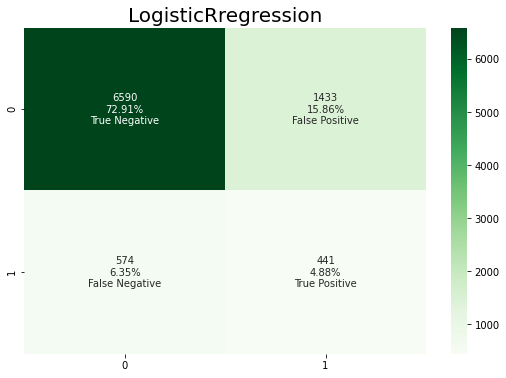

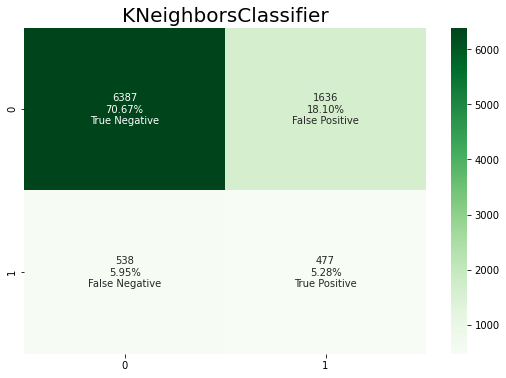

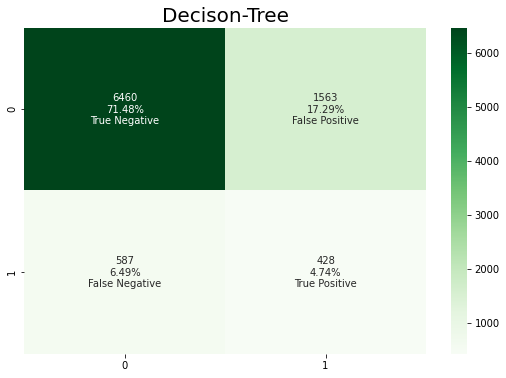

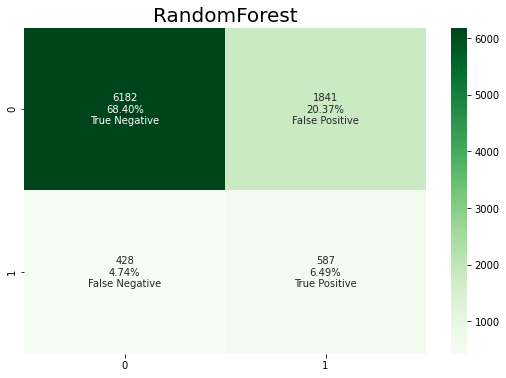

In [12]:
for name, model in models:
    y_pred = model.predict(X_test)
    conf = confusion_matrix(y_test, y_pred)

    titulo = name
    nome_quadrantes = ['True Negative','False Positive','False Negative','True Positive']
    valor_quadrantes = ["{0:0.0f}".format(value) for value in
    conf.flatten()]
    percentagem_quadrantes = ["{0:.2%}".format(value) for value in
    conf.flatten()/np.sum(conf)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
    zip(valor_quadrantes,percentagem_quadrantes,nome_quadrantes)]
    labels = np.asarray(labels).reshape(2,2)
    fig = plt.figure(figsize=(9,6))
    plt.title(titulo, fontsize =20)
    sns.heatmap(conf, annot=labels, fmt="", cmap='Greens')
    plt.show()

for name, model in models:
    y_pred = model.predict(X_test)
    conf = confusion_matrix(y_test, y_pred)
    trace1 = ff.create_annotated_heatmap(z = conf,
                                         x = ["False Negative","True Positive"],
                                         y = ["True Negative","False Positive"],
                                         showscale  = False,name = name)
    fig.add_trace(go.Heatmap(trace1.data[0]))
    fig.show()

fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)

for i in range(prob_prediction.shape[1]):
    y_true = y_onehot.iloc[:, i]
    y_score = y_scores[:, i]

    precision, recall, _ = precision_recall_curve(data_y, predictions)
    auc_score = average_precision_score(data_y, predictions)

    name = f"{y_onehot.columns[i]} (AP={auc_score:.2f})"
    fig.add_trace(go.Scatter(x=recall, y=precision, name=name, mode='lines'))

fig.update_layout(
    xaxis_title='Recall',
    yaxis_title='Precision',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=700, height=500
)
fig.show()

conf = conf.astype(int)
class_names = [0,1]
layout = dict(width=350, height=280, margin={'t': 10},
                           xaxis=dict(title='Predicted class', tickvals=[0, 1]),
                           yaxis=dict(title='True class', tickvals=[0, 1], autorange='reversed'))

fig = go.Figure(data=go.Heatmap(go.Heatmap(x=class_names, y=class_names, z=conf, showscale=True, colorscale='blues'),
                layout = layout))

                fig.show()

In [13]:
fig = go.Figure()
for name, model in models:
    #kfold = model_selection.KFold(n_splits=10)
    #proba = cross_val_predict(model, X_resample, y_resample, cv = kfold, n_jobs=-1, method='predict_proba')
    prob_prediction = model.predict_proba(X_test)[:,1]
    #prob_prediction = proba[:,1]
    fpr, tpr, _ = roc_curve(y_test, prob_prediction)
    auc = roc_auc_score(y_test, prob_prediction)
    fig.add_trace(go.Scatter(x = fpr, y = tpr, name = name + ": AUROC = %.2f" % auc))
fig.add_shape(type='line', line=dict(dash='dash'),x0=0, x1=1, y0=0, y1=1)
fig.update_layout(title = 'Curva ROC AUC', xaxis_title = "Taxa de falsos Positivos", yaxis_title = "Taxa de falsos Negativos")
fig.update_layout(height = 700, width=1000)
    
fig.show()

fig = go.Figure()
for name, model in models:
    kfold = model_selection.StratifiedKFold(n_splits=10, random_state=None)
    prob_prediction = cross_val_predict(model, data_x, data_y, cv = kfold, n_jobs=-1, method='predict_proba')
    fpr, tpr, _ = roc_curve(data_y, prob_prediction)
    auc = roc_auc_score(data_y, prob_prediction)
    fig.add_trace(go.Scatter(x = fpr, y = tpr, name = name + ": AUROC = %.2f" % auc))
fig.update_layout(title = 'Curva ROC AUC', xaxis_title = "Taxa de falsos Positivos", yaxis_title = "Taxa de falsos Negativos")
fig.update_layout(height = 700, width=1000)
    
fig.show()

for name, model in models:
    y_proba = model.predict_proba(X_test)
    y_proba = y_proba[:, 1]
    r_auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, __ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, marker='.', label ='modelo(AUROC = %0.3f)' % r_auc)

    plt.title('Roc Plot')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()